In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('file:///C:/Users/Aishwarya/Desktop/Datasets/calories_consumed.csv')
d.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
x = d['Calories Consumed']
y = d['Weight gained (grams)']

Text(0, 0.5, 'Weight Gained')

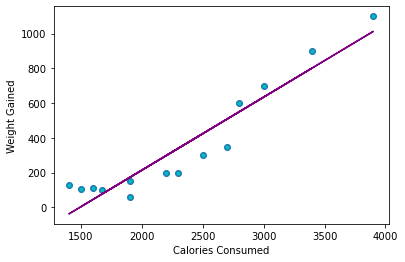

In [4]:
from numpy.polynomial.polynomial import polyfit

b,m= polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,y, '.', color='c')
plt.plot(x, b+m*x, '-', color='purple')
plt.xlabel('Calories Consumed')
plt.ylabel('Weight Gained')

- Correlation Check

In [5]:
cor = np.corrcoef(x,y)
print(cor)

[[1.         0.94699101]
 [0.94699101 1.        ]]


# Model Building

In [9]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [10]:
model = sm.OLS(y ,x).fit()
predicted_model = model.predict(x)

In [11]:
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.806
Model:                               OLS   Adj. R-squared (uncentered):              0.791
Method:                    Least Squares   F-statistic:                              53.95
Date:                   Thu, 03 Dec 2020   Prob (F-statistic):                    5.63e-06
Time:                           15:24:05   Log-Likelihood:                         -94.855
No. Observations:                     14   AIC:                                      191.7
Df Residuals:                         13   BIC:                                      192.3
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.1762      0.024      7.345      0.000       0.124       0.228
==============================================================================
Omnibus:                        4.807   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.081
Skew:                           1.148   Prob(JB):                        0.214
Kurtosis:                       2.893   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 - Log transformation of X

In [13]:
lg_x = np.log(d['Calories Consumed'])

In [14]:
model = sm.OLS(y, lg_x).fit()
predicted_model = model.predict(lg_x)

In [15]:
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.588
Model:                               OLS   Adj. R-squared (uncentered):              0.556
Method:                    Least Squares   F-statistic:                              18.56
Date:                   Thu, 03 Dec 2020   Prob (F-statistic):                    0.000851
Time:                           15:25:28   Log-Likelihood:                         -100.12
No. Observations:                     14   AIC:                                      202.2
Df Residuals:                         13   BIC:                                      202.9
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed    47.7934     11.095      4.308      0.001      23.825      71.762
==============================================================================
Omnibus:                        4.807   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                3.032
Skew:                           1.139   Prob(JB):                        0.220
Kurtosis:                       2.932   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Log Transformation of Y

In [16]:
lg_y = np.log(d['Weight gained (grams)'])
model = sm.OLS(lg_y, x).fit()
predicted_model = model.predict(x)

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Weight gained (grams)   R-squared (uncentered):                   0.974
Model:                               OLS   Adj. R-squared (uncentered):              0.972
Method:                    Least Squares   F-statistic:                              490.2
Date:                   Thu, 03 Dec 2020   Prob (F-statistic):                    1.05e-11
Time:                           15:31:30   Log-Likelihood:                         -18.295
No. Observations:                     14   AIC:                                      38.59
Df Residuals:                         13   BIC:                                      39.23
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Calories Consumed     0.0022      0.000     22.141      0.000       0.002       0.002
==============================================================================
Omnibus:                        1.372   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.432
Skew:                          -0.428   Prob(JB):                        0.806
Kurtosis:                       3.093   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Log Transformation of x and y

In [22]:
model = sm.OLS(lg_x,lg_y).fit()
predicted_model = model.predict(lg_x)
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Calories Consumed   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              850.9
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                    3.11e-13
Time:                        15:33:24   Log-Likelihood:                         -19.098
No. Observations:                  14   AIC:                                      40.20
Df Residuals:                      13   BIC:                                      40.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Weight gained (grams)     1.3771      0.047     29.171      0.000       1.275       1.479
==============================================================================
Omnibus:                        0.546   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.573
Skew:                          -0.170   Prob(JB):                        0.751
Kurtosis:                       2.069   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can use Log transformation of X and Y model as it gives the best r2 value.